Project Overview：
This project aims to study the various factors that affect house prices in Seattle. I downloaded a dataset from Kaggle, which includes data on the number of rooms, number of bathrooms, area, and location to help with data processing and analysis. Initially, I believed these factors influence house prices in Seattle. I particularly wanted to analyze the impact of area on house prices. My hypothesis is that as the area increases, the number of rooms increases, and consequently, the house price also rises.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

house = pd.read_csv("HousePrice.csv")

print(house.shape)

(505, 8)


Data Preparation：
First, I planned to remove duplicate data to reduce errors and avoid redundant operations during plotting and prediction later on.

In [12]:
house = house.drop_duplicates()#delete the duplicate data

print(house.shape)

(504, 8)


In [13]:
print(house.describe())

             beds       baths         size     lot_size      zip_code  \
count  504.000000  504.000000   504.000000   427.000000    504.000000   
mean     2.958333    2.222222  1854.771825  4003.813981  98125.220238   
std      1.213022    1.012949   921.120496  2693.165468     24.681935   
min      1.000000    1.000000   376.000000     0.230000  98101.000000   
25%      2.000000    1.500000  1173.250000  1365.000000  98108.000000   
50%      3.000000    2.000000  1690.000000  4192.000000  98118.000000   
75%      4.000000    2.500000  2402.500000  6000.000000  98126.000000   
max      9.000000    7.000000  6139.000000  9974.000000  98199.000000   

              price  
count  5.040000e+02  
mean   9.795417e+05  
std    6.090798e+05  
min    1.700000e+05  
25%    6.197425e+05  
50%    8.400000e+05  
75%    1.156250e+06  
max    6.250000e+06  


Data Preparation：
Next, I categorized the number of rooms. Houses with more than 5 rooms were classified as large, those with 3-5 rooms as median, and those with fewer than 3 rooms as small. This categorization helped keep the data organized. However, the challenge I faced was that the number of rooms might not be the main factor influencing the price, so the categorized data might have a minimal impact on the prediction results.

In [14]:
def house_type(type):#Room size according to number of beds
  if type >= 5:
    return "large"
  elif type >=3 and type <5:
    return "median"
  else:
    return "small"


house["type"] = house["beds"].apply(house_type)

print(house["beds"].describe())

print(house.head)

count    504.000000
mean       2.958333
std        1.213022
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: beds, dtype: float64
<bound method NDFrame.head of      beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0       3    3.0  2850.0       sqft   4200.00           sqft     98119   
1       4    5.0  3040.0       sqft   5002.00           sqft     98106   
2       3    1.0  1290.0       sqft   6048.00           sqft     98125   
3       3    2.0  2360.0       sqft      0.28           acre     98188   
4       3    3.5  1942.0       sqft   1603.00           sqft     98107   
..    ...    ...     ...        ...       ...            ...       ...   
500     5    4.5  5580.0       sqft      0.30           acre     98146   
501     3    2.5  1390.0       sqft   1570.00           sqft     98126   
502     3    2.5  2950.0       sqft      0.47           acre     98118   
503     5    5.0  3010.0       sqft   4887.

Data Discovery and Exploration：Next, I wanted to use the processed data to determine a general price range. Due to the large number of data types, bar charts and line charts were not suitable for data processing. Therefore, I used scatter plots to visualize the data. By using scatter plots, I was able to judge the general price range under the conditions of "number of rooms," "number of bathrooms," "area," and "location" based on the density of the points.

   beds      price
0     3  1175000.0
1     4  1057500.0
2     3   799000.0
3     3   565000.0
4     3  1187000.0


<ipython-input-15-1ee60d5060ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_beds.sort_values(by = 'beds', inplace = True)


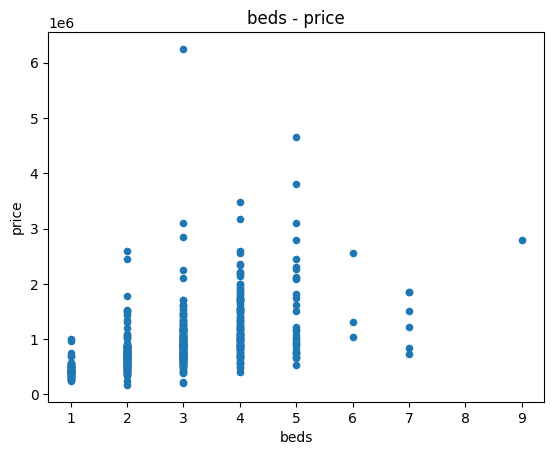

In [15]:
house_beds = house[['beds', 'price']]

print(house_beds.head())

house_beds.sort_values(by = 'beds', inplace = True)
house_beds.plot.scatter(x = 'beds', y = 'price')
plt.title('beds - price')
plt.show()

<bound method NDFrame.head of      baths      price
0      3.0  1175000.0
1      5.0  1057500.0
2      1.0   799000.0
3      2.0   565000.0
4      3.5  1187000.0
..     ...        ...
500    4.5  3800000.0
501    2.5   575000.0
502    2.5  3105000.0
503    5.0  1807000.0
504    2.0   895000.0

[504 rows x 2 columns]>


<function matplotlib.pyplot.show(close=None, block=None)>

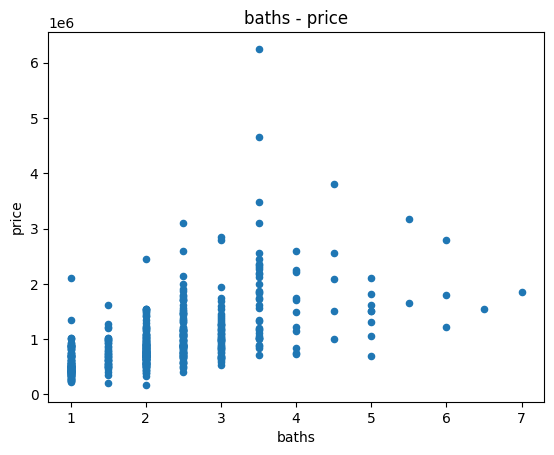

In [ ]:
house_baths = house[["baths", "price"]]

print(house_baths.head)

house_baths.plot.scatter(x = 'baths', y = 'price')

plt.title('baths - price')
plt.show

<bound method NDFrame.head of        size      price
0    2850.0  1175000.0
1    3040.0  1057500.0
2    1290.0   799000.0
3    2360.0   565000.0
4    1942.0  1187000.0
..      ...        ...
500  5580.0  3800000.0
501  1390.0   575000.0
502  2950.0  3105000.0
503  3010.0  1807000.0
504  1301.0   895000.0

[504 rows x 2 columns]>


<ipython-input-7-f5446ab260ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_size.sort_values(by = 'size', inplace = True)


<function matplotlib.pyplot.show(close=None, block=None)>

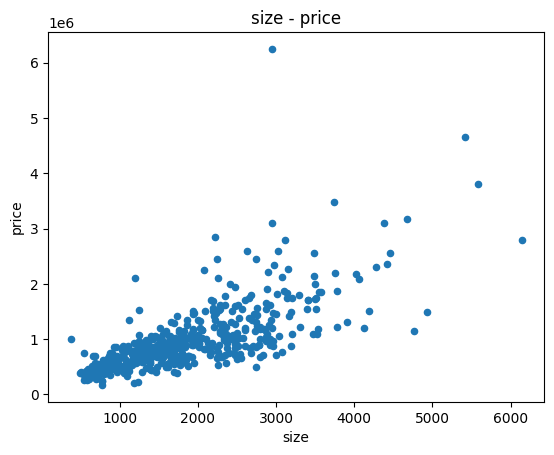

In [ ]:
house_size = house[["size","price"]]

print(house_size.head)

house_size.sort_values(by = 'size', inplace = True)

house_size.plot.scatter(x = 'size', y = 'price')

plt.title('size - price')
plt.show

<bound method NDFrame.head of      zip_code      price
0       98119  1175000.0
1       98106  1057500.0
2       98125   799000.0
3       98188   565000.0
4       98107  1187000.0
..        ...        ...
500     98146  3800000.0
501     98126   575000.0
502     98118  3105000.0
503     98115  1807000.0
504     98103   895000.0

[504 rows x 2 columns]>


<function matplotlib.pyplot.show(close=None, block=None)>

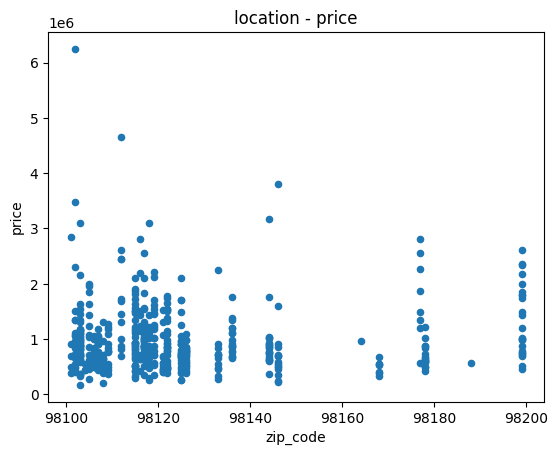

In [ ]:
house_zip = house[["zip_code", "price"]]

print(house_zip.head)

house_zip.plot.scatter(x = "zip_code", y = "price")

plt.title('location - price')
plt.show

Then, I started making model predictions to explore the relationship between price and area. By using the training data X (area) and y (price), I displayed the trained model graphically. The results showed that as the area increases, the house price also increases.

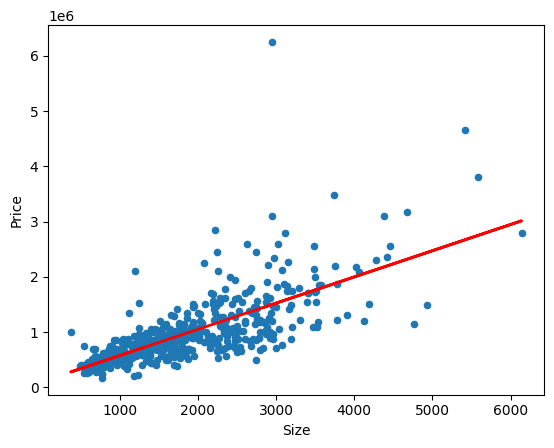

In [ ]:
x = house[['size']].values.reshape(-1,1)

y = house[['price']].values.reshape(-1,1)

LinearModel = LinearRegression()

LinearModel.fit(x,y)

yPredicted = LinearModel.predict(x)

house_size.plot.scatter(x = 'size', y = 'price')
plt.plot(x, yPredicted, linewidth = 2, color = 'red')
plt.xlabel('Size')
plt.ylabel('Price')

plt.show()

Models and Model Performance：
Finally, I used the KNN model with K=5 to evaluate the model's accuracy, but the accuracy was only 0.9%, which is less than 1%, indicating that this model is not suitable for my data processing. After reducing the types of x variables, I found that the reason for the low accuracy was "size". However, size may not be the direct factor influencing price; other factors also contribute to price trends. Therefore, I believe the low accuracy is likely due to the excessive number of influencing factors, not just the area. It may also be because this model is not suitable for predicting price trends.

In [ ]:
x = house[['beds', 'baths', 'size', 'zip_code']]
y = house[["price"]]
y = y.values.ravel()

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knnModel = KNeighborsClassifier(n_neighbors = 5)

knnModel = knnModel.fit(x_train, y_train)

y_pred = knnModel.predict(x_test)

score = accuracy_score(y_test, y_pred)

print("K-Nearest Neighbors Model Accuracy:", score)



K-Nearest Neighbors Model Accuracy: 0.009900990099009901


Conclusion：Through this project, I found that there is indeed a relationship between area and house prices. However, the KNN model performed poorly on this dataset, with an accuracy of only 0.9%, indicating that it cannot accurately predict house prices. My hypothesis was partially validated, but due to the model's limitations and the complexity of the data, the results were not entirely satisfactory. In the future, I may try using other machine learning models to improve prediction accuracy. Additionally, considering more influencing factors and conducting more detailed data analysis might also improve the model's performance.